In [1]:
from sklearn import datasets, linear_model, metrics
import scipy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
seed = 244810
x,y  = datasets.make_regression(n_features=1,noise=16,n_samples=100, random_state=seed)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### metoda chyba numeryczna

In [4]:
x_mean = np.mean(X_train)
y_train_re = np.reshape(y_train,(len(y_train), 1))
y_mean = np.mean(y_train_re)

xvar = (X_train - x_mean)**2
xycov = (y_train_re - y_mean)*(X_train - x_mean)

alfa = xycov.sum() / xvar.sum()
beta = y_mean - (alfa*x_mean)

print(alfa)
print(beta)

51.45617535713391
2.58187409306662


### Metoda analityczna

In [5]:
Y = y
X = np.ones((len(x),1))

X = np.concatenate((X,x),axis=1)

### $$θ = (X^T X)^{-1} X^T Y$$

In [17]:
#rozbite na części
#X^T Y
xty = np.matmul(np.transpose(X),Y)
#X^T X
xtx = np.matmul(np.transpose(X),X)
#(X^T X)^-1
xtxinv =np.linalg.inv(xtx)
#answer
ans = np.matmul(xtxinv,xty)


In [15]:
answer = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.matmul(np.transpose(X),Y))


### Wykres

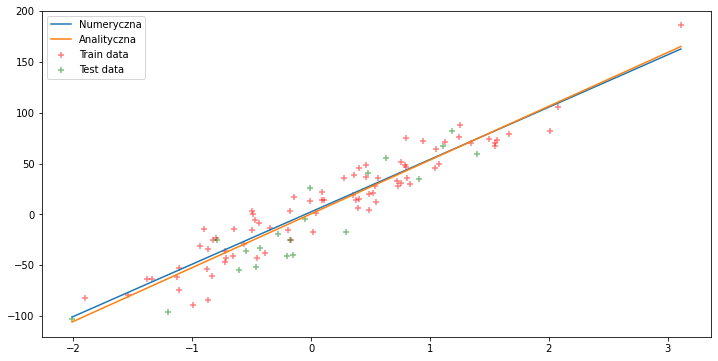

In [7]:
plt.figure(figsize=(12,6))

plt.scatter(X_train,y_train, color='red', alpha=0.5, marker='+', label="Train data")
plt.scatter(X_test,y_test, color='green', alpha=0.5, marker='+', label="Test data")

plt.plot([min(x),max(x)],[alfa*min(x)+beta, alfa*max(x)+beta], label="Numeryczna")
plt.plot([min(x),max(x)], [answer[1]*min(x)+answer[0] , answer[1]*max(x)+answer[0]], label="Analityczna" )

plt.legend()



#### MSE

In [8]:
y_pred_an = np.empty(len(y_test))

for i in range(len(y_test)):
    y_pred_an[i] = answer[1]*X_test[i][0]+answer[0]



In [9]:
MSE_an = np.square(np.subtract(y_test, y_pred_an )).mean()
MSE_an

416.94113707642646

In [10]:
y_pred_num = np.empty(len(y_test))

for i in range(len(y_test)):
    y_pred_num[i] = alfa*X_test[i][0]+beta

y_pred_num

array([ 3.48872656e+01, -6.66955052e+00,  6.35191958e+01, -1.00885846e+02,
       -1.18920452e-02, -2.11998827e+01,  4.92165792e+01,  1.74877180e+01,
       -1.95766549e+01, -2.55436247e+01, -7.89142938e+00,  5.98424103e+01,
        2.00569474e+00, -2.87728116e+01,  7.41937150e+01, -5.27808324e+00,
       -3.82243835e+01, -5.95449845e+01, -1.15706385e+01,  2.70771718e+01])

In [11]:
MSE_num = np.square(np.subtract(y_test, y_pred_num )).mean()
MSE_num

462.30622370954814